<a href="https://colab.research.google.com/github/manabil/Machine_Learning_Intermediate/blob/main/3-%20Natural%20Language%20Processing/3G-%20NLP%20Multiclass%20Text%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> * Nama : Muhammad Ammar Nabil
* Kelas : M03
* email : mammarnabil1@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Bidirectional, LSTM, Dropout

In [ ]:
# Open file
raw = pd.read_csv('emotions.txt', names=['sentences', 'label'], sep=';')
raw.label.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

In [ ]:
# One Hot Category
category = pd.get_dummies(raw.label)
dataset = pd.concat([raw, category], axis=1)
dataset = dataset.drop(columns='label')
dataset

,sentences,anger,fear,joy,love,sadness,surprise
0,im feeling quite sad and sorry for myself but ...,0,0,0,0,1,0
1,i feel like i am still looking at a blank canv...,0,0,0,0,1,0
2,i feel like a faithful servant,0,0,0,1,0,0
3,i am just feeling cranky and blue,1,0,0,0,0,0
4,i can have for a treat or if i am feeling festive,0,0,1,0,0,0
...,...,...,...,...,...,...,...
19995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
19996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
19997,i feel strong and good overall,0,0,1,0,0,0
19998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
# Separate Data and label
sentences = dataset['sentences'].values
label = dataset[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [ ]:
# Split data train and data test
sentences_latih, sentences_test, label_latih, label_test = train_test_split(sentences, label, test_size=0.2)

In [ ]:
# Required Hyperparameter
vocab_size = 20000
embedding_dim = 64
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
# Create Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences_latih) 
tokenizer.fit_on_texts(sentences_test)
    
# Create Sequnces
sekuens_latih = tokenizer.texts_to_sequences(sentences_latih)
sekuens_test = tokenizer.texts_to_sequences(sentences_test)

# Choose Max Sequences
max_sequence_latih = max([len(x) for x in sekuens_latih])
max_sequence_test = max([len(x) for x in sekuens_test])
max_length = max_sequence_latih if max_sequence_latih > max_sequence_test else max_sequence_test
print(f'Max Sequences\t= {max_length} word')
    
# Padding Sequences
padded_latih = pad_sequences(sekuens_latih, maxlen=max_length, padding=padding_type, truncating=trunc_type) 
padded_test = pad_sequences(sekuens_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

total_word = len(tokenizer.word_index)
print(f'Word Total\t= {total_word} word')
print(padded_latih[0].shape)
print(padded_test[0].shape)

Max Sequences	= 66 word
Word Total	= 17097 word
(66,)
(66,)


In [ ]:
# Create Callback
callbacks= [
    EarlyStopping('val_loss', 0.002, 3, 1),
    CSVLogger('log/logging.csv', ';')
]

In [ ]:
# Create Model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Dropout(0.6),
    Bidirectional(LSTM(10, return_sequences=True)),
    Bidirectional(LSTM(10)),
    Dense(24, activation='relu', kernel_regularizer=L1(0.00025)),
    Dense(6, activation='softmax')
])

# Compile Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 66, 64)            1280000   
                                                                 
 dropout_2 (Dropout)         (None, 66, 64)            0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 66, 20)           6000      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                504       
                                                                 
 dense_5 (Dense)             (None, 6)                

In [ ]:
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test),
                    callbacks=callbacks)

Epoch 1/20
500/500 [==============================] - 48s 80ms/step - loss: 1.5143 - accuracy: 0.4200 - val_loss: 1.1782 - val_accuracy: 0.5683
Epoch 2/20
500/500 [==============================] - 37s 75ms/step - loss: 0.9316 - accuracy: 0.6625 - val_loss: 0.7069 - val_accuracy: 0.7635
Epoch 3/20
500/500 [==============================] - 37s 75ms/step - loss: 0.5907 - accuracy: 0.8033 - val_loss: 0.5266 - val_accuracy: 0.8303
Epoch 4/20
500/500 [==============================] - 39s 78ms/step - loss: 0.4329 - accuracy: 0.8581 - val_loss: 0.4208 - val_accuracy: 0.8615
Epoch 5/20
500/500 [==============================] - 38s 75ms/step - loss: 0.3376 - accuracy: 0.8876 - val_loss: 0.3692 - val_accuracy: 0.8773
Epoch 6/20
500/500 [==============================] - 38s 75ms/step - loss: 0.2888 - accuracy: 0.9051 - val_loss: 0.3498 - val_accuracy: 0.8917
Epoch 7/20
500/500 [==============================] - 39s 78ms/step - loss: 0.2461 - accuracy: 0.9222 - val_loss: 0.3170 - val_accuracy:

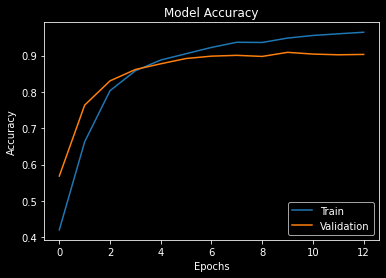

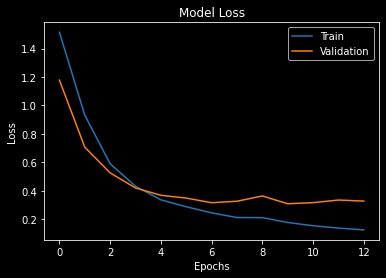

In [ ]:
# Plot Accuracy and error
plt.style.use('dark_background')

# PLOT AKURASI
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], '#1f77b4')
plt.plot(history.history['val_accuracy'], '#ff7f0e')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# PLOT LOSS
plt.title('Model Loss')
plt.plot(history.history['loss'], '#1f77b4')
plt.plot(history.history['val_loss'], '#ff7f0e')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make function predict
def get_label(value: str) -> str:
    sentences = [value]
    sequences = tokenizer.texts_to_sequences(sentences)
    sequences_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
    prediction = model.predict(sequences_pad)
    max = 0
    label = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    for i in prediction[0].tolist():
        if max < i:
            max = i
    return label[prediction[0].tolist().index(max)]

print(f"You're emotion is {get_label(str(input('Enter your sentences: ')))}")

Enter your sentences: the sky look grey
You're emotion is sadness
